In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
house = pd.read_csv("Housing.csv")

In [160]:
house.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [226]:
house.head(8)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


# Simple Regression 
- predict 'price' using 'area'
- y  =  b0  +  b1 * x

In [162]:
data = house[['price','area']]
data.head(4)

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500


In [227]:
y = house['price'].to_numpy()
x = house['area'].to_numpy()

x.shape

(545,)

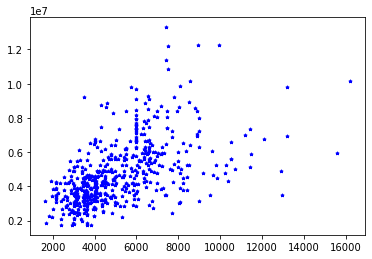

In [232]:
plt.scatter(x, y, color = "b",marker = "*", s = 10)

In [164]:
y_mean = np.mean(y)
x_mean = np.mean(x)

num = 0   # numerator
den = 0   # denominator

n = np.size(y)

In [165]:
for i in range(n):
    num += (x[i] - x_mean) * (y[i] - y_mean)
    den += (x[i] - x_mean)**2
    
b1 = num / den
b0 = y_mean - b1*x_mean

print(b0,b1)

2387308.482396433 461.9748942727828


In [166]:
prediction = b0 + b1*x
for i in range(n):
    prediction[i] = prediction[i]//1

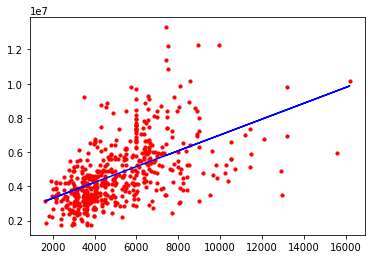

In [167]:
plt.scatter(x, y, color = "r",marker = "o", s = 10)
plt.plot(x, prediction, color = "b")

# Multiple regression

- y = b0 + b1 * x1 + b2 * x2 + ...

In [168]:
house.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [178]:
# dependent -> price
y = house['price'].to_numpy()

# -> independent variables
x = house[['area','bedrooms','bathrooms','stories']].to_numpy()

n = np.size(y)
x

array([[7420,    4,    2,    3],
       [8960,    4,    4,    4],
       [9960,    3,    2,    2],
       ...,
       [3620,    2,    1,    1],
       [2910,    3,    1,    1],
       [3850,    3,    1,    2]], dtype=int64)

In [177]:
y_mean = np.mean(y)
x_mean = [0,0,0,0]

for i in range(n):
    for j in range(4):
        x_mean[j] += x[i][j]

for i in range(4):
    x_mean[i] /= n

x_mean

[5150.54128440367, 2.9651376146788992, 1.2862385321100918, 1.8055045871559634]

In [181]:
b = []
for j in range(4):
    num = 0    # numerator
    den = 0    # denominator
    
    for i in range(n):
        num += (x[i][j] - x_mean[j]) * (y[i] - y_mean)
        den += (x[i][j] - x_mean[j])**2
    b.append(num / den)

b

[461.9748942727828, 928788.1189320377, 1926558.8901060484, 907116.9031974602]

In [182]:
# y = b0 + b1x1 + b2x2 + b3x3 + ...
# finding b0

b0 = y_mean
for i in range(4):
    b0 -= b[i]*x_mean[i]
b0

-4482494.113759189

In [210]:
predictions = []
for i in range(n):
    predictions.append(int(b0 + b[0]*x[i][0] + b[1]*x[i][1] + b[2]*x[i][2] + b[3]*x[i][3]))

predictions

[9234980,
 14706656,
 8572491,
 8364821,
 6401304,
 8455475,
 12604547,
 15239350,
 6715447,
 8441811,
 8142731,
 9598418,
 7925945,
 6516922,
 7574626,
 5745300,
 7949044,
 9712242,
 6096306,
 6937100,
 4040394,
 6369535,
 4856443,
 6077827,
 8036600,
 7921325,
 8557305,
 5237573,
 9501498,
 7440871,
 9238717,
 7092721,
 7154447,
 8651151,
 7062147,
 9019279,
 8334834,
 10872017,
 6630746,
 9486093,
 5070598,
 8723615,
 8779052,
 9486093,
 9486093,
 7650188,
 8557305,
 6907931,
 5957713,
 6501198,
 9222548,
 6780887,
 9486093,
 8164626,
 6743071,
 4816512,
 8258443,
 10872017,
 10262210,
 8557305,
 6743071,
 4311094,
 7782733,
 8745287,
 6300115,
 8073558,
 6306826,
 6621311,
 3909395,
 10485286,
 5819121,
 9486093,
 6178010,
 7905701,
 3911041,
 6868022,
 7844217,
 7881175,
 3770802,
 7650188,
 4816512,
 5819121,
 7914841,
 8557305,
 3781688,
 8689631,
 6033152,
 2966966,
 4560780,
 11719101,
 4354537,
 3327088,
 8002935,
 6390324,
 9486093,
 6772435,
 5295320,
 4094185,
 7927373,
 6

In [211]:
predictions = pd.DataFrame(predictions)
predictions.rename(columns={0:'Predictions'},inplace=True)
predictions

,Predictions
0,9234980
1,14706656
2,8572491
3,8364821
4,6401304
...,...
540,1594682
541,2246285
542,1881107
543,2481892


In [212]:
predictions['Original'] = y
predictions

,Predictions,Original
0,9234980,13300000
1,14706656,12250000
2,8572491,12250000
3,8364821,12215000
4,6401304,11410000
...,...,...
540,1594682,1820000
541,2246285,1767150
542,1881107,1750000
543,2481892,1750000


In [215]:
predictions['Difference'] = predictions['Original'] - predictions['Predictions']

In [217]:
predictions

,Predictions,Original,Difference
0,9234980,13300000,4065020
1,14706656,12250000,-2456656
2,8572491,12250000,3677509
3,8364821,12215000,3850179
4,6401304,11410000,5008696
...,...,...,...
540,1594682,1820000,225318
541,2246285,1767150,-479135
542,1881107,1750000,-131107
543,2481892,1750000,-731892


In [219]:
house.info

<bound method DataFrame.info of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no

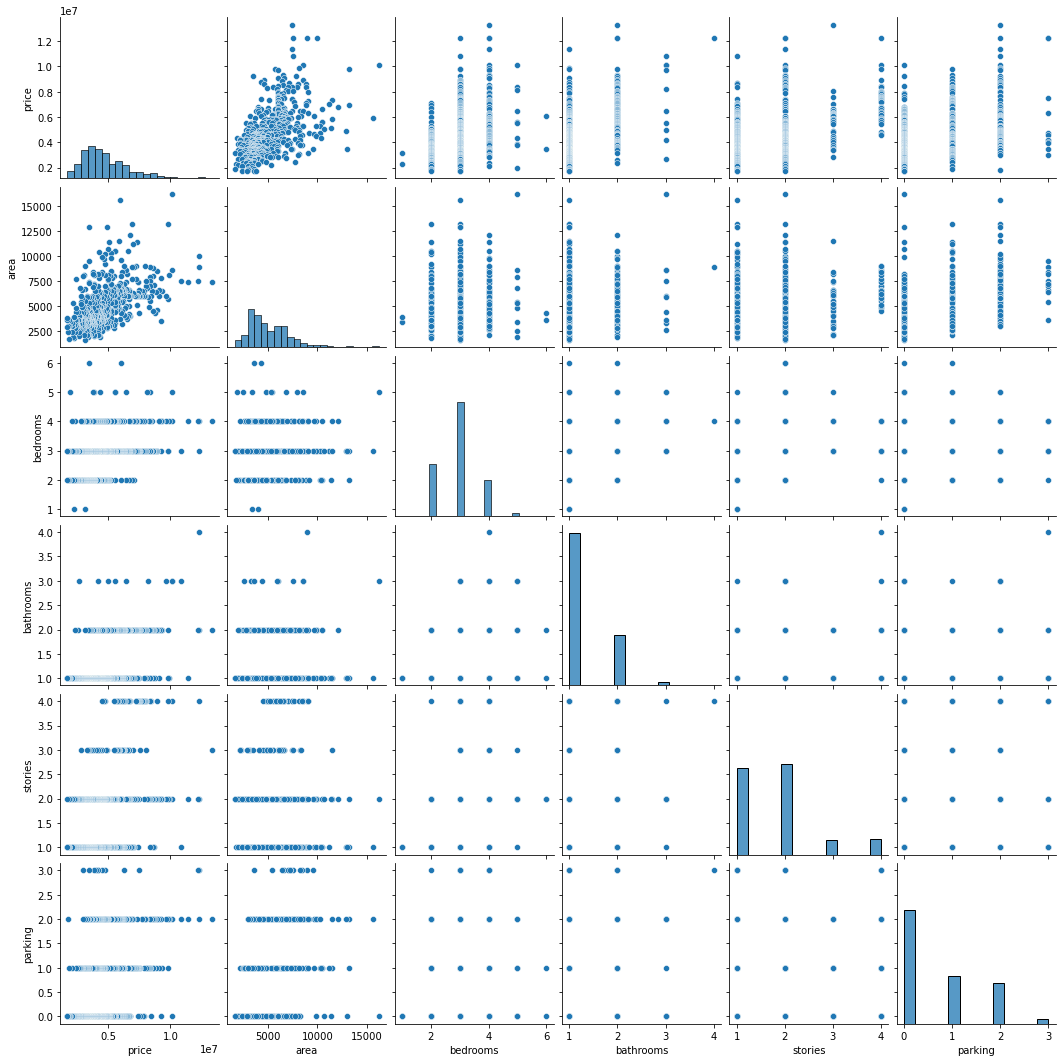

In [220]:
sns.pairplot(house)

Only viable pair is  AREA <-> PRICE  which best fits linear regression

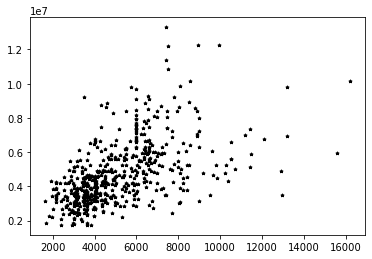

In [225]:
plt.scatter(house['area'], house['price'], color = "black",marker = "*", s = 10)